## Persiapan


### Menyiapkan library yang dibutuhkan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib
import os
import json
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# cek versi tensorflow
tf.__version__

'2.18.0'

### Menyiapkan data yang akan diguankan


## Data Understanding


In [ ]:
df = pd.read_csv('FedCycleData.csv')
df.head(10)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [ ]:
df.shape

(1665, 80)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClientID,1665,159,nfp8122,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CycleNumber,1665.0,NaN,NaN,NaN,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
Group,1665.0,NaN,NaN,NaN,0.382583,0.486164,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1665.0,NaN,NaN,NaN,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,NaN,NaN,NaN,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
NextpregM,1665,8,,1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spousesame,1665,4,,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpousesameM,1665,3,,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timeattemptpreg,1665,2,,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("\nNilai unik untuk setiap kolom:")
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n")


Nilai unik untuk setiap kolom:
ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' '

In [ ]:
# Mengganti spasi kosong dengan NaN
df = df.replace(' ', np.nan)
print("\nJumlah nilai yang hilang di setiap kolom setelah mengganti spasi kosong:")
print(df.isnull().sum())


Jumlah nilai yang hilang di setiap kolom setelah mengganti spasi kosong:
ClientID                   0
CycleNumber                0
Group                      0
CycleWithPeakorNot         0
ReproductiveCategory       0
                        ... 
NextpregM               1524
Spousesame              1523
SpousesameM             1523
Timeattemptpreg         1523
BMI                     1534
Length: 80, dtype: int64


In [ ]:
# Memisahkan kolom dengan/tanpa nilai yang hilang
missing_cols = []
non_missing_cols = []
for cols in df.columns:
    if df[cols].isnull().sum() == 0:
        non_missing_cols.append(cols)
    else:
        missing_cols.append(cols)

print(f'\nJumlah Kolom tanpa ada nilai yang hilang:  {len(non_missing_cols)}')
print(f'Jumlah Kolom dengan nilai yang hilang :  {len(missing_cols)}')


Jumlah Kolom tanpa ada nilai yang hilang:  6
Jumlah Kolom dengan nilai yang hilang :  74


In [ ]:
# Tampilkan hanya kolom yang punya NaN
print("\nJumlah NaN pada kolom dengan nilai hilang:")
print(df[missing_cols].isna().sum())


Jumlah NaN pada kolom dengan nilai hilang:
MeanCycleLength            1524
EstimatedDayofOvulation     150
LengthofLutealPhase         151
FirstDayofHigh              258
TotalNumberofHighDays        12
                           ... 
NextpregM                  1524
Spousesame                 1523
SpousesameM                1523
Timeattemptpreg            1523
BMI                        1534
Length: 74, dtype: int64


## Data Preparation / Preprocessing


In [ ]:
# Menghitung persentase nilai hilang
null_counts = df.isnull().sum().sort_values(ascending=False)
null_percentages = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False) * 100
null_values_df = pd.DataFrame({
    "Column Name": null_counts.index,
    "Total Number of Missing Values": null_counts.values,
    "Missing Values in Percentage": null_percentages.values
})

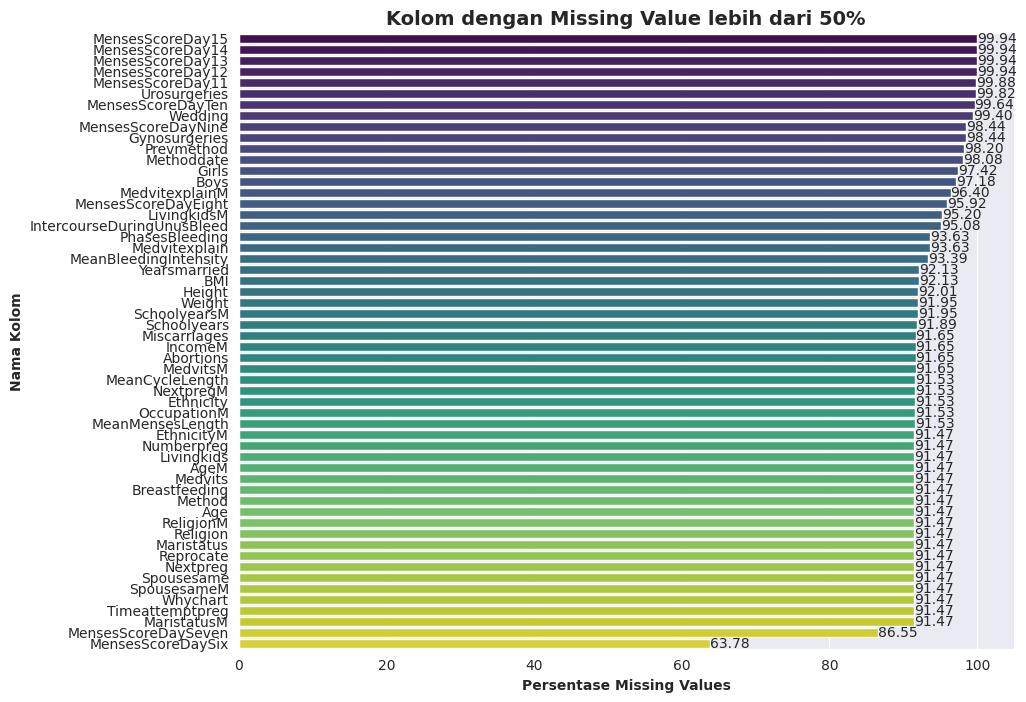

In [ ]:
# Visualisasi Missing value lebih dari 50%
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=null_values_df[null_values_df["Missing Values in Percentage"] >= 50],
    x="Missing Values in Percentage",
    y="Column Name",
    hue="Column Name",
    palette="viridis",
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Kolom dengan Missing Value lebih dari 50%', fontsize=14, fontweight='bold')
plt.xlabel('Persentase Missing Values', fontweight='bold')
plt.ylabel('Nama Kolom', fontweight='bold')
plt.show()

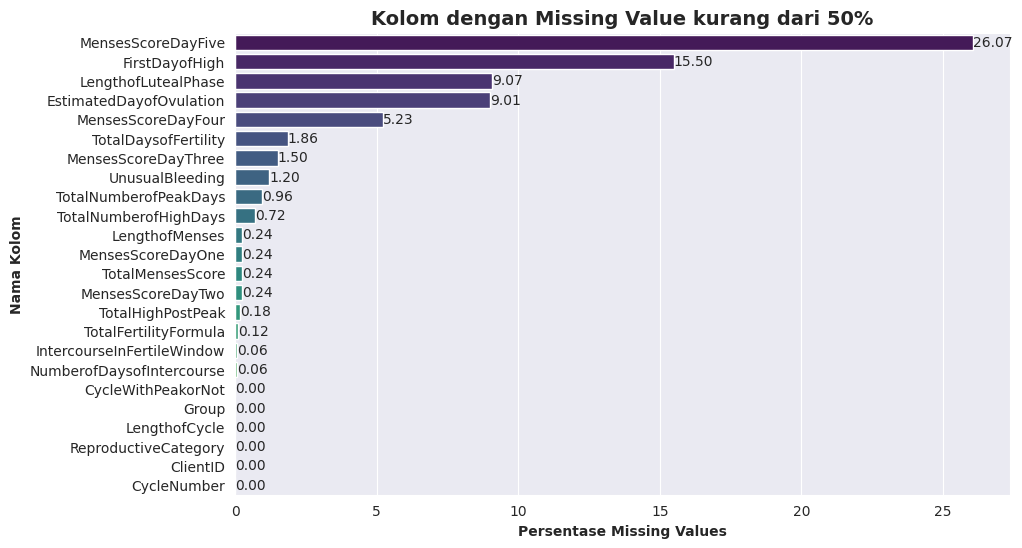

In [ ]:
# Visualisasi Missing value kurang dari 50%
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=null_values_df[null_values_df["Missing Values in Percentage"] < 50],
    x="Missing Values in Percentage",
    y="Column Name",
    hue="Column Name",
    palette="viridis",
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Kolom dengan Missing Value kurang dari 50%', fontsize=14, fontweight='bold')
plt.xlabel('Persentase Missing Values', fontweight='bold')
plt.ylabel('Nama Kolom', fontweight='bold')
plt.show()

In [ ]:
# Drop kolom dengan jumlah non-null kurang dari 1200
# Menggunakan .count() untuk menghitung nilai non-null
df = df.drop(columns=[col for col in df.columns if df[col].count() < 1200])
print(f"Bentuk data setelah menghapus kolom dengan jumlah non-null kurang dari 1200: {df.shape}")

print("\nTipe data sebelum Label Encoding:")
print(df.dtypes)

Bentuk data setelah menghapus kolom dengan jumlah non-null kurang dari 1200: (1665, 24)

Tipe data sebelum Label Encoding:
ClientID                      object
CycleNumber                    int64
Group                          int64
CycleWithPeakorNot             int64
ReproductiveCategory           int64
LengthofCycle                  int64
EstimatedDayofOvulation       object
LengthofLutealPhase           object
FirstDayofHigh                object
TotalNumberofHighDays         object
TotalHighPostPeak             object
TotalNumberofPeakDays         object
TotalDaysofFertility          object
TotalFertilityFormula         object
LengthofMenses                object
MensesScoreDayOne             object
MensesScoreDayTwo             object
MensesScoreDayThree           object
MensesScoreDayFour            object
MensesScoreDayFive            object
TotalMensesScore              object
NumberofDaysofIntercourse     object
IntercourseInFertileWindow    object
UnusualBleeding           

In [ ]:
df.drop(['ClientID', 'CycleNumber', 'ReproductiveCategory', 'Group', 'MensesScoreDayOne',
         'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
         'MensesScoreDayFive', 'TotalMensesScore'], axis=1, inplace=True
        )
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

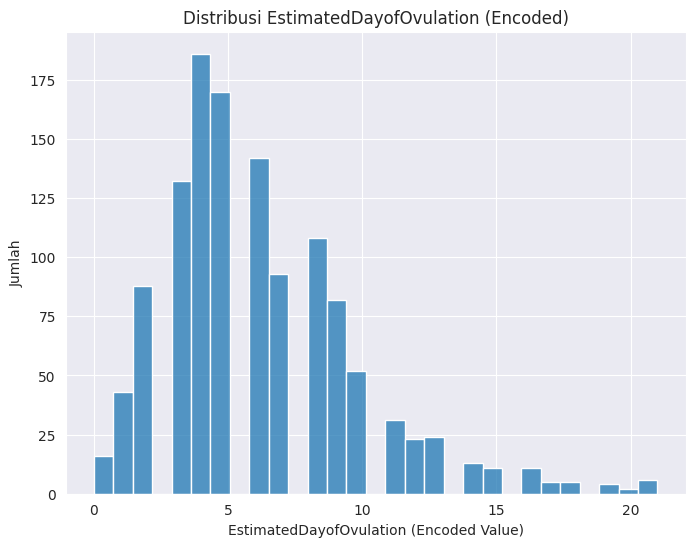

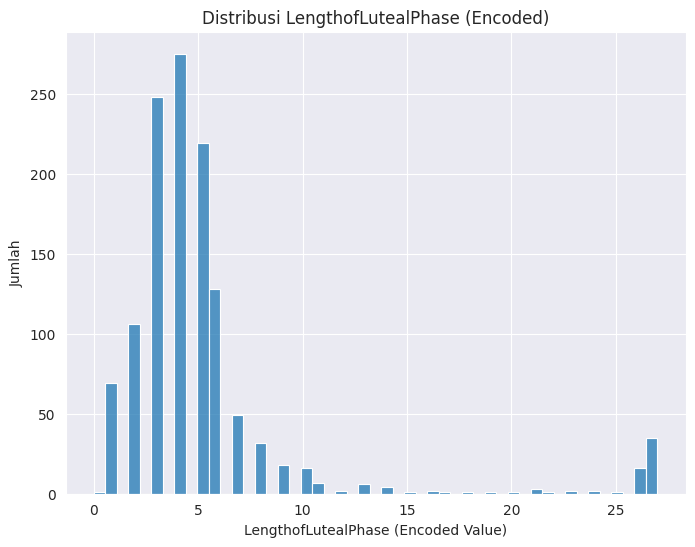

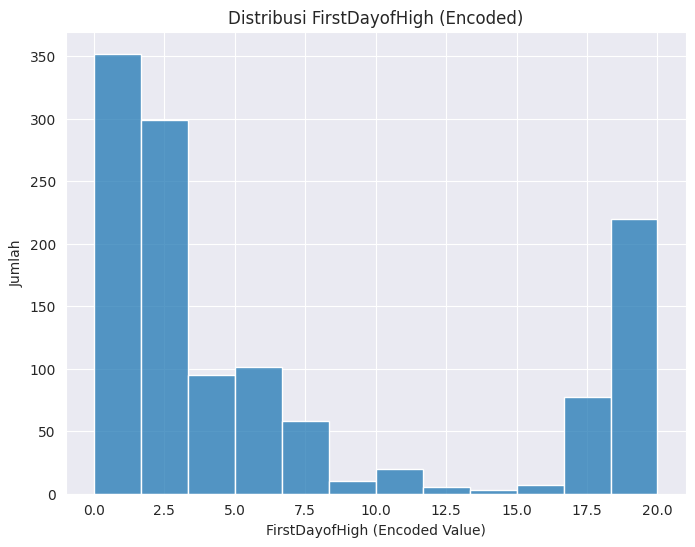

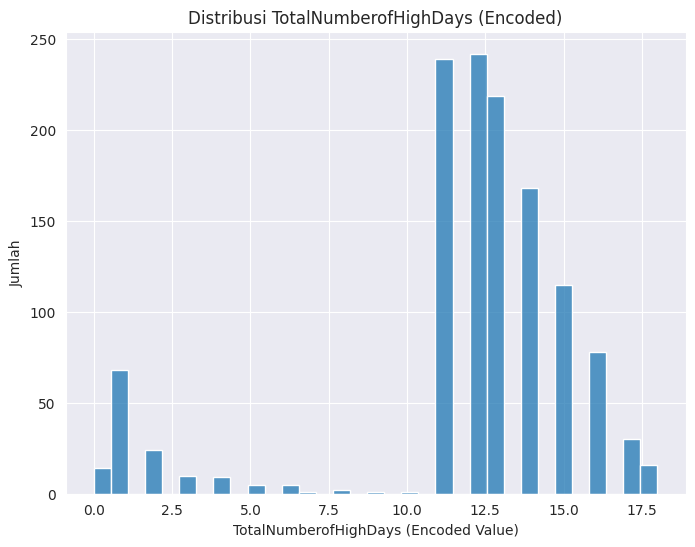

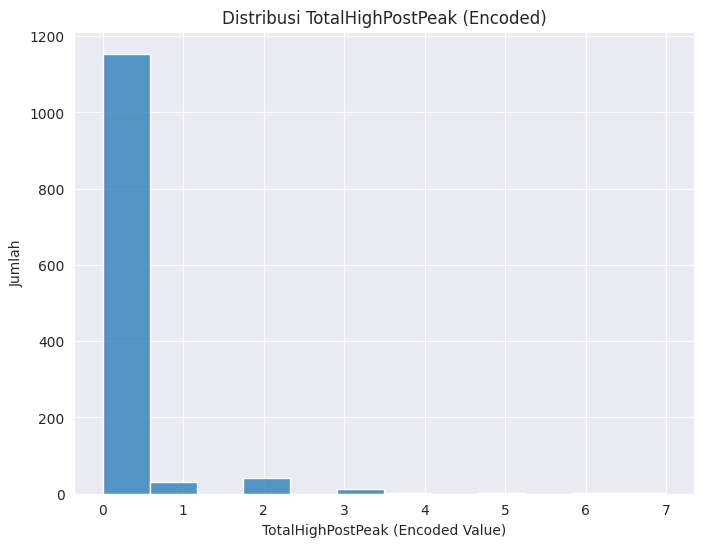

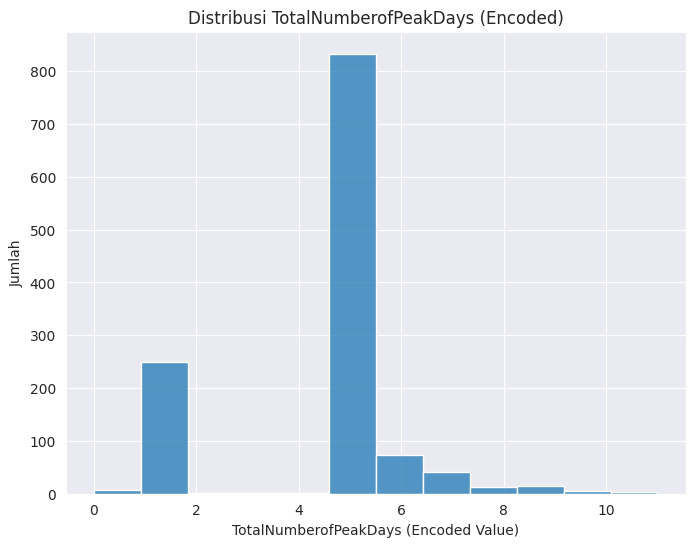

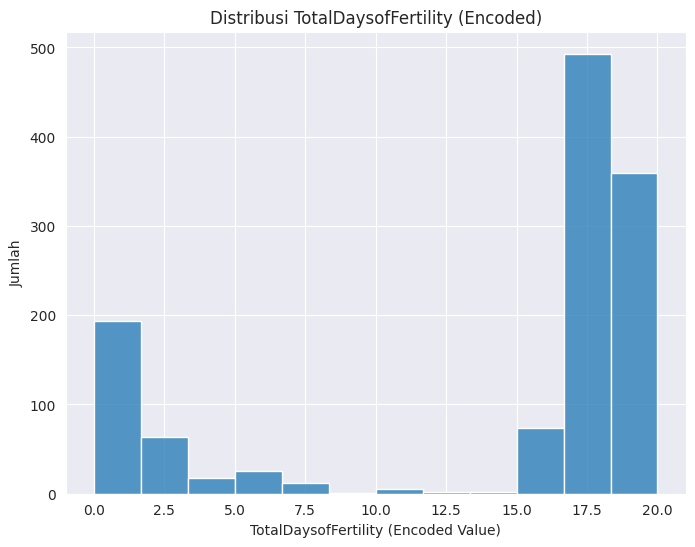

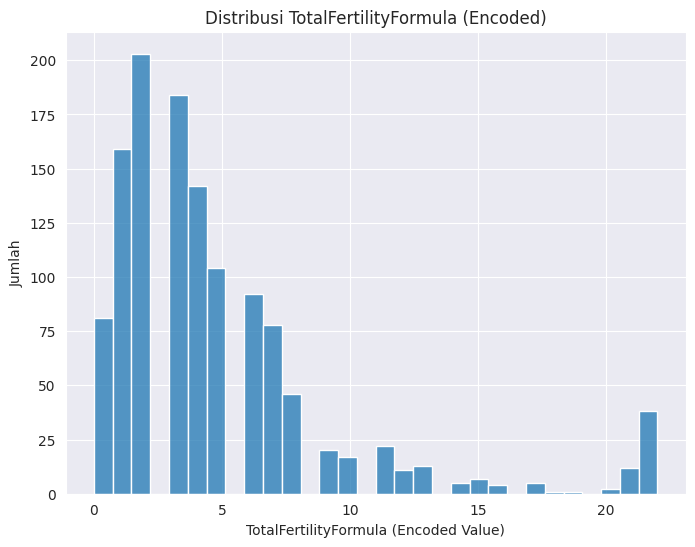

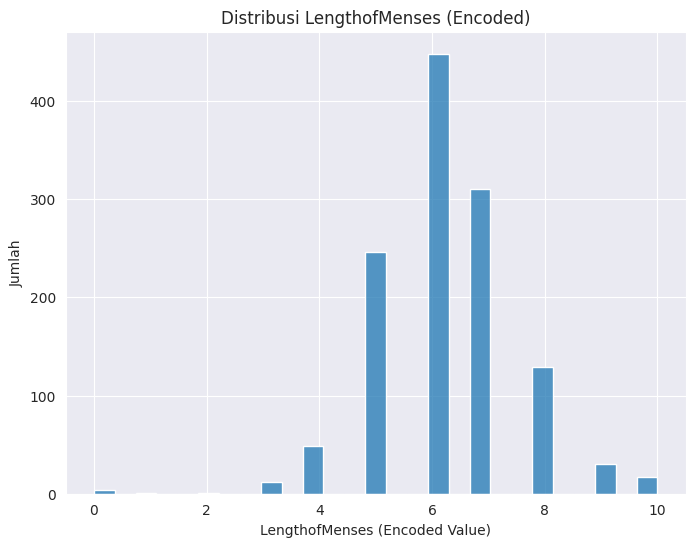

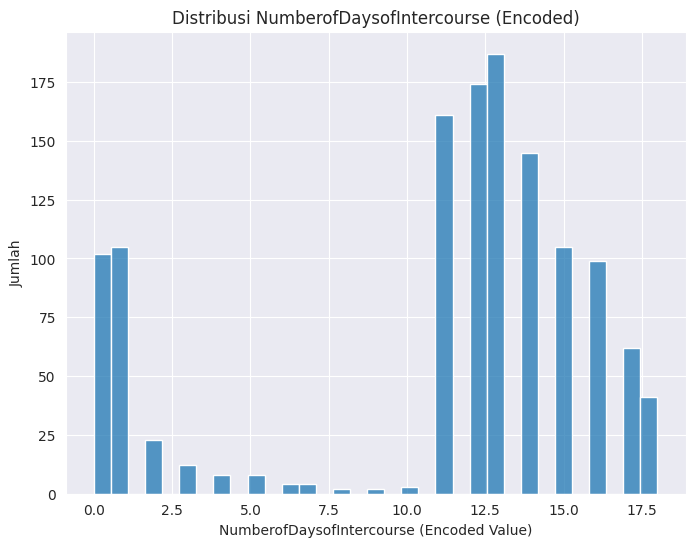

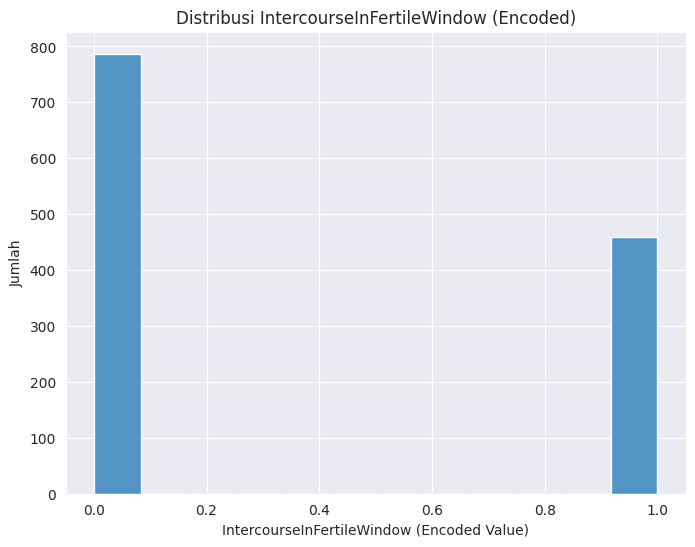

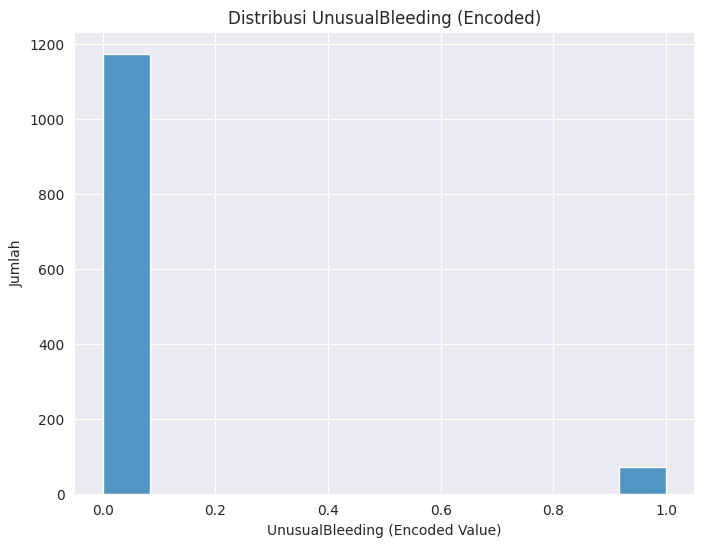


Tipe data setelah Label Encoding:
CycleWithPeakorNot            int64
LengthofCycle                 int64
EstimatedDayofOvulation       int64
LengthofLutealPhase           int64
FirstDayofHigh                int64
TotalNumberofHighDays         int64
TotalHighPostPeak             int64
TotalNumberofPeakDays         int64
TotalDaysofFertility          int64
TotalFertilityFormula         int64
LengthofMenses                int64
NumberofDaysofIntercourse     int64
IntercourseInFertileWindow    int64
UnusualBleeding               int64
dtype: object


In [ ]:
# Label encoding untuk kolom kategorikal (object)
categorical_columns = df.select_dtypes(include='object').columns
label_encoders_map = {} # Menyimpan encoder untuk setiap kolom

for cols in categorical_columns:
    if cols in df.columns:
        le = LabelEncoder()
        df[cols] = le.fit_transform(df[cols].astype(str))
        label_encoders_map[cols] = le # Simpan encoder

# Cek distribusi data categorical setelah encoding
for i in categorical_columns:
    if i in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df[i], kde=False)
        plt.title(f'Distribusi {i} (Encoded)')
        plt.xlabel(f'{i} (Encoded Value)')
        plt.ylabel('Jumlah')
        plt.show()

print("\nTipe data setelah Label Encoding:")
print(df.dtypes)

In [ ]:
# Mengisi Missing values (NaN) pada kolom numerik dengan mean
# Atau, jika kolom tidak numerik, isi dengan modus
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'unknown', inplace=True) # Handle empty mode

print("\nJumlah nilai hilang setelah imputasi:")
print(df.isnull().sum())


Jumlah nilai hilang setelah imputasi:
CycleWithPeakorNot            0
LengthofCycle                 0
EstimatedDayofOvulation       0
LengthofLutealPhase           0
FirstDayofHigh                0
TotalNumberofHighDays         0
TotalHighPostPeak             0
TotalNumberofPeakDays         0
TotalDaysofFertility          0
TotalFertilityFormula         0
LengthofMenses                0
NumberofDaysofIntercourse     0
IntercourseInFertileWindow    0
UnusualBleeding               0
dtype: int64


In [ ]:
# Menghapus baris duplikat
df.drop_duplicates(inplace=True)
print(f"Bentuk data setelah menghapus duplikat: {df.shape}")

Bentuk data setelah menghapus duplikat: (1232, 14)


In [ ]:
print("\nRingkasan statistik setelah preprocessing:")
df.describe().T


Ringkasan statistik setelah preprocessing:


,count,mean,std,min,25%,50%,75%,max
CycleWithPeakorNot,1232.0,0.998377,0.040275,0.0,1.0,1.0,1.00,1.0
LengthofCycle,1232.0,29.301948,3.693329,21.0,27.0,29.0,31.00,51.0
EstimatedDayofOvulation,1232.0,6.197240,3.656568,0.0,4.0,5.0,8.00,21.0
LengthofLutealPhase,1232.0,5.444805,5.090908,0.0,3.0,4.0,6.00,27.0
FirstDayofHigh,1232.0,6.771916,7.355701,0.0,1.0,3.0,11.25,20.0
TotalNumberofHighDays,1232.0,11.849838,3.936872,0.0,11.0,13.0,14.00,18.0
TotalHighPostPeak,1232.0,0.161526,0.666511,0.0,0.0,0.0,0.00,7.0
TotalNumberofPeakDays,1232.0,4.401786,1.940235,0.0,5.0,5.0,5.00,11.0
TotalDaysofFertility,1232.0,13.940747,7.285557,0.0,8.0,17.0,19.00,20.0
TotalFertilityFormula,1232.0,4.864448,4.747256,0.0,2.0,3.0,6.00,22.0


### Handling Outliers


Visualisasi Outliers sebelum Capping (Boxplot):


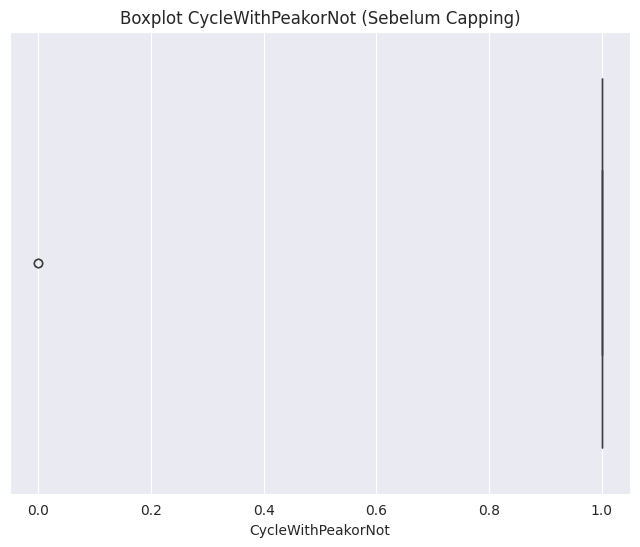

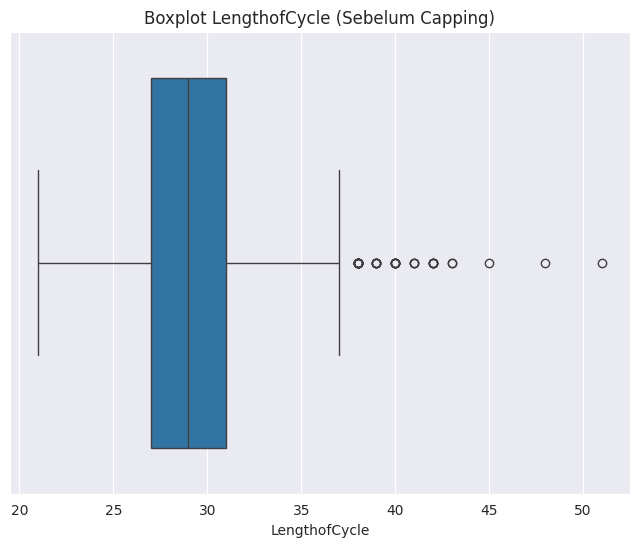

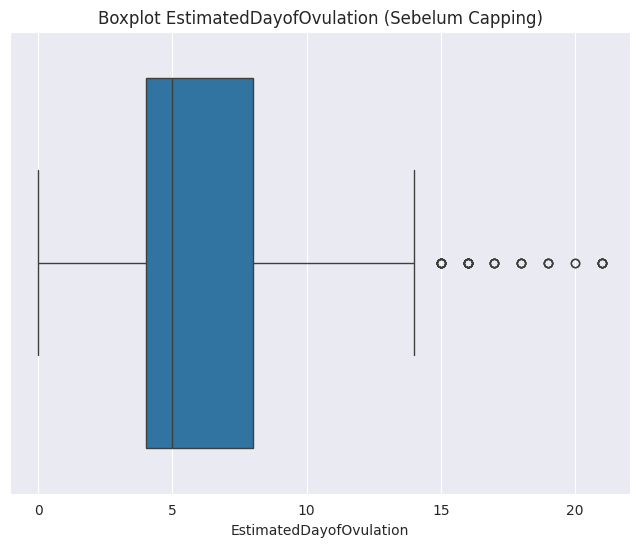

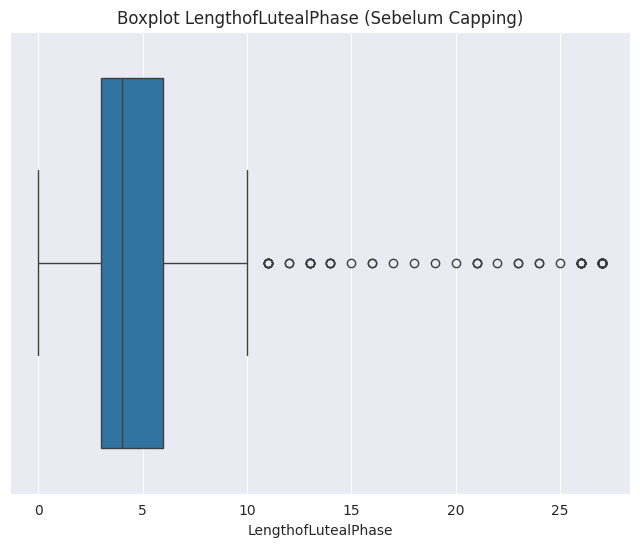

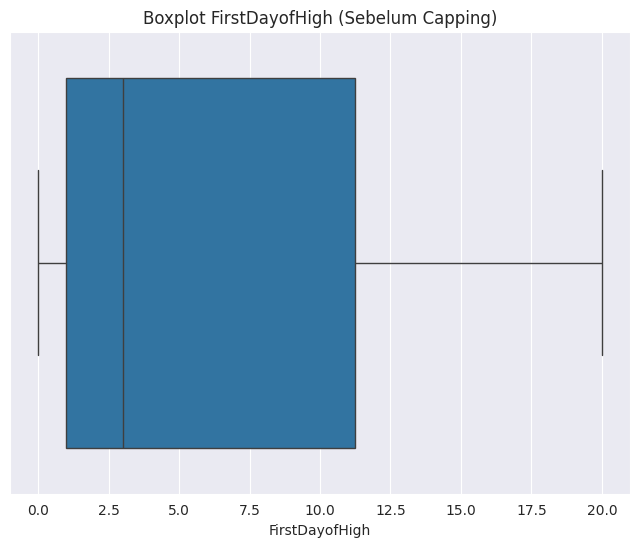

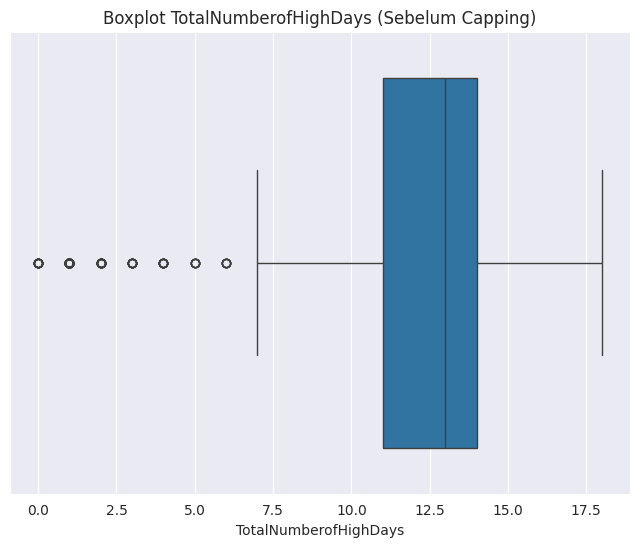

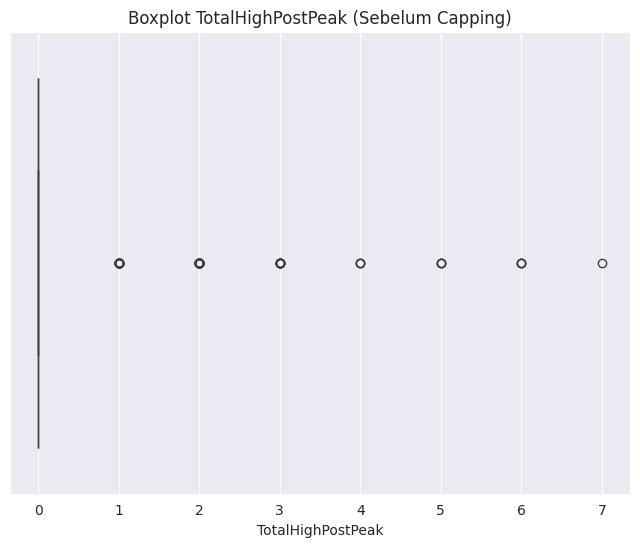

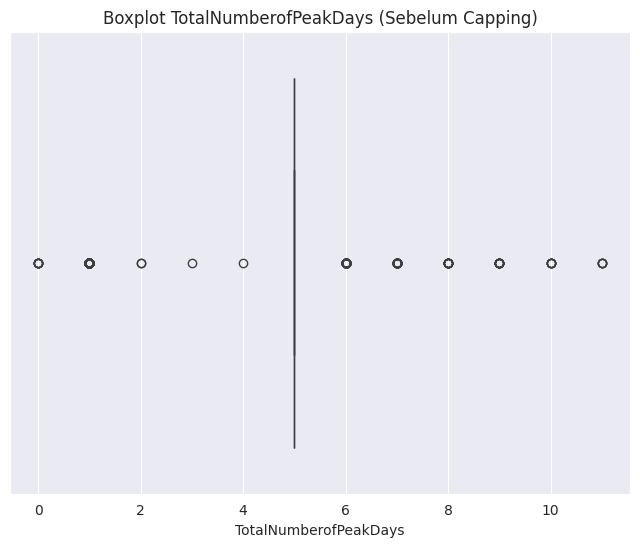

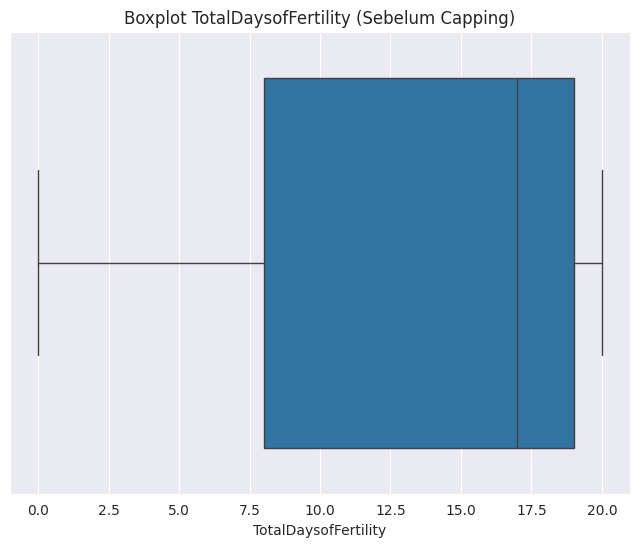

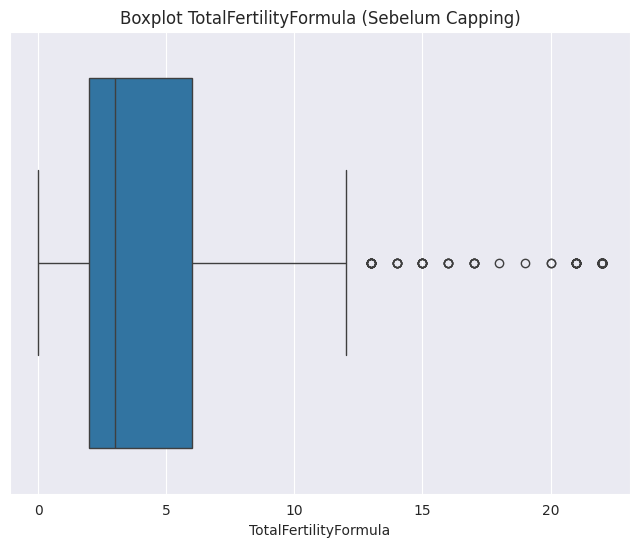

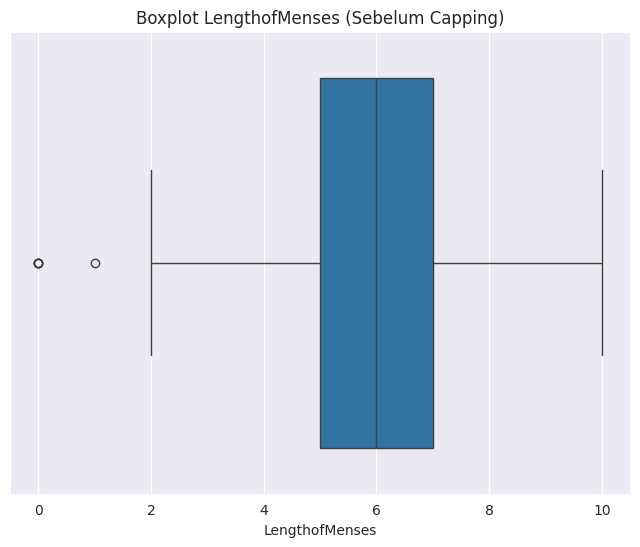

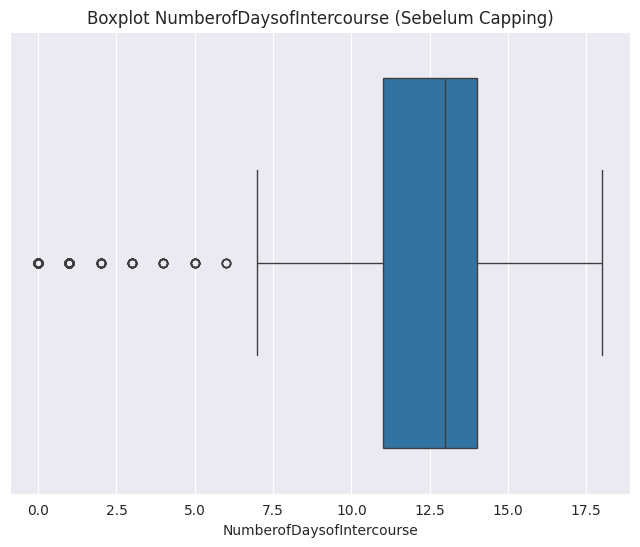

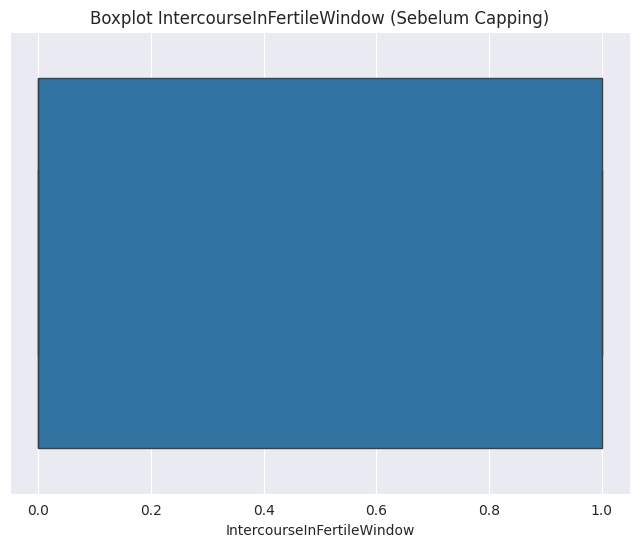

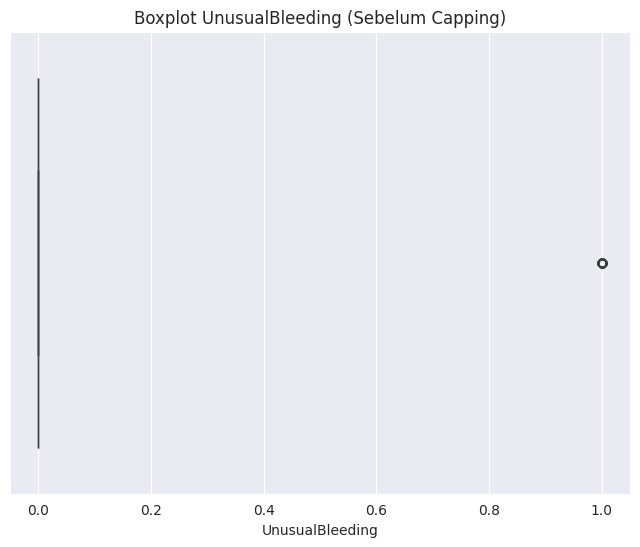

In [ ]:
# Visualisasi dengan boxplot (sebelum capping)
print("\nVisualisasi Outliers sebelum Capping (Boxplot):")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} (Sebelum Capping)')
    plt.show()

In [ ]:
# Menghitung persentase outliers dengan IQR dan melakukan capping
print("\nPersentase Outliers per Kolom (menggunakan IQR) dan Proses Capping:")
outliers_percentages_before_capping = []
for col in df.select_dtypes(include=['int64', 'float64']).columns: # Hanya untuk kolom numerik
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_count_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage_before = (outliers_count_before / len(df[col])) * 100
    outliers_percentages_before_capping.append({'Column': col, 'Outlier Percentage (Before Capping)': outliers_percentage_before})

    # Melakukan capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Kolom '{col}': {outliers_percentage_before:.2f}% outliers dicapping.")

outliers_df_before = pd.DataFrame(outliers_percentages_before_capping)
outliers_df_before = outliers_df_before.sort_values(by='Outlier Percentage (Before Capping)', ascending=False)
print("\nRekap Persentase Outlier Sebelum Capping:")
print(outliers_df_before)


Persentase Outliers per Kolom (menggunakan IQR) dan Proses Capping:
Kolom 'CycleWithPeakorNot': 0.16% outliers dicapping.
Kolom 'LengthofCycle': 3.49% outliers dicapping.
Kolom 'EstimatedDayofOvulation': 3.57% outliers dicapping.
Kolom 'LengthofLutealPhase': 6.74% outliers dicapping.
Kolom 'FirstDayofHigh': 0.00% outliers dicapping.
Kolom 'TotalNumberofHighDays': 10.88% outliers dicapping.
Kolom 'TotalHighPostPeak': 7.55% outliers dicapping.
Kolom 'TotalNumberofPeakDays': 33.60% outliers dicapping.
Kolom 'TotalDaysofFertility': 0.00% outliers dicapping.
Kolom 'TotalFertilityFormula': 7.06% outliers dicapping.
Kolom 'LengthofMenses': 0.41% outliers dicapping.
Kolom 'NumberofDaysofIntercourse': 21.02% outliers dicapping.
Kolom 'IntercourseInFertileWindow': 0.00% outliers dicapping.
Kolom 'UnusualBleeding': 5.84% outliers dicapping.

Rekap Persentase Outlier Sebelum Capping:
                        Column  Outlier Percentage (Before Capping)
7        TotalNumberofPeakDays                


Visualisasi Outliers setelah Capping (Boxplot):


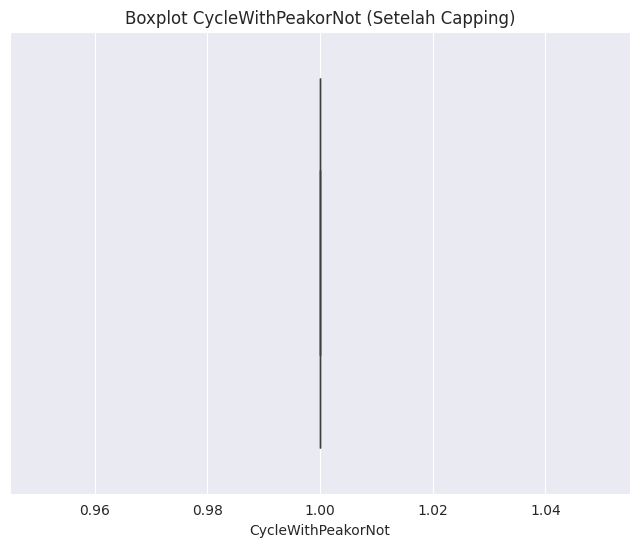

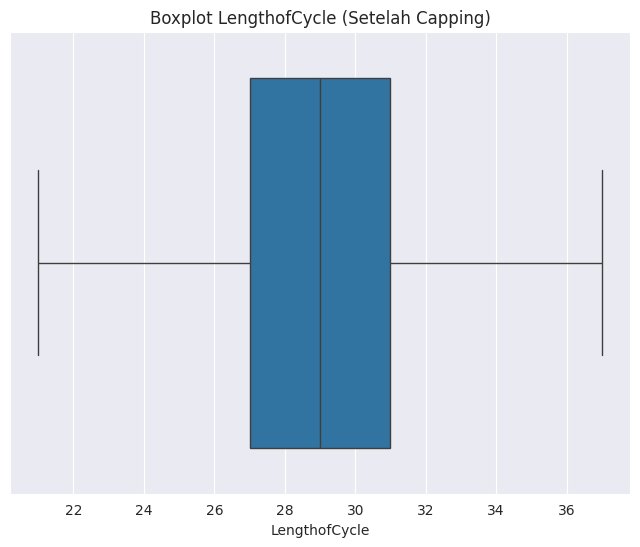

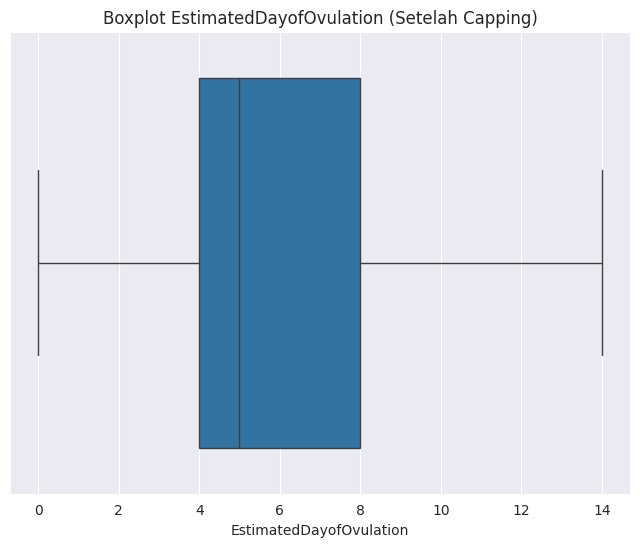

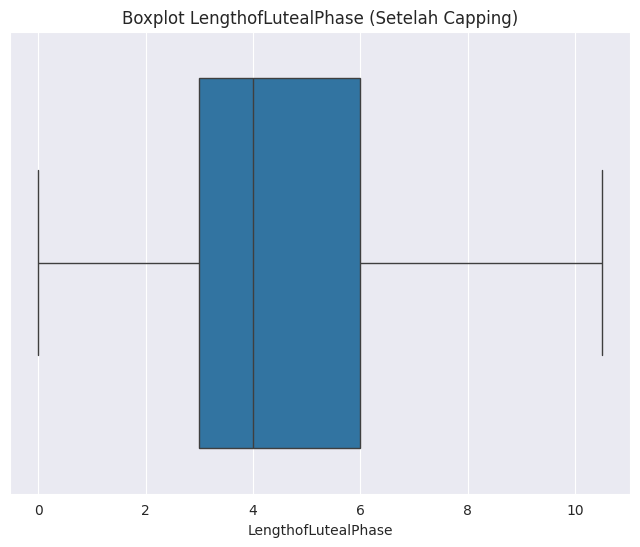

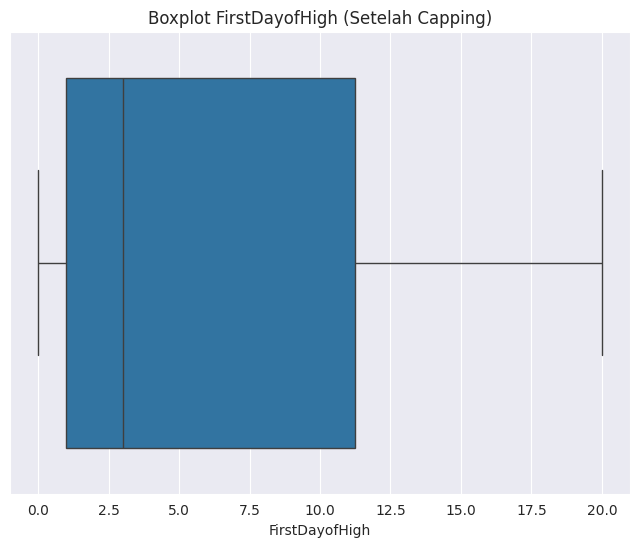

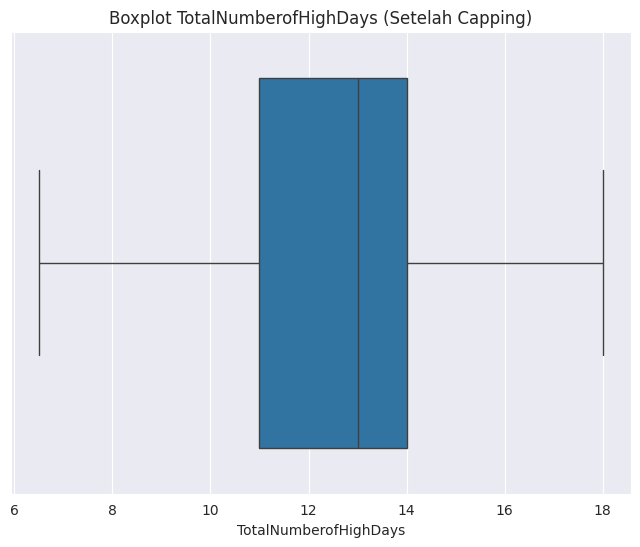

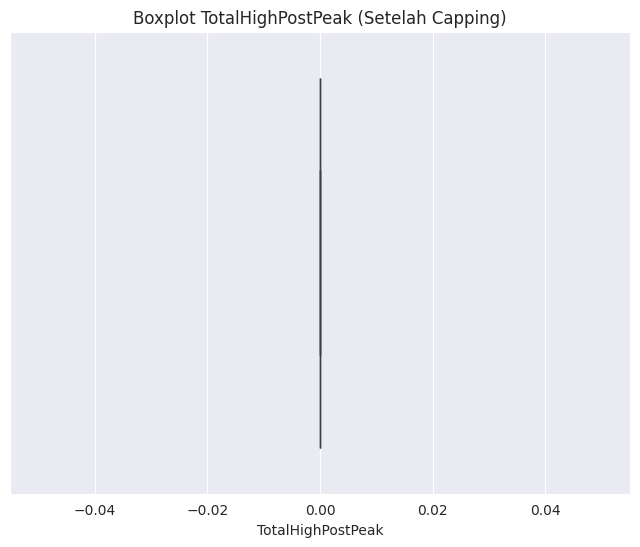

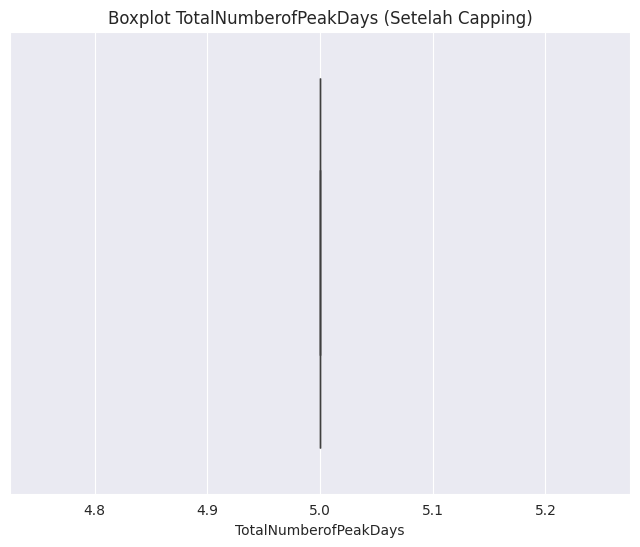

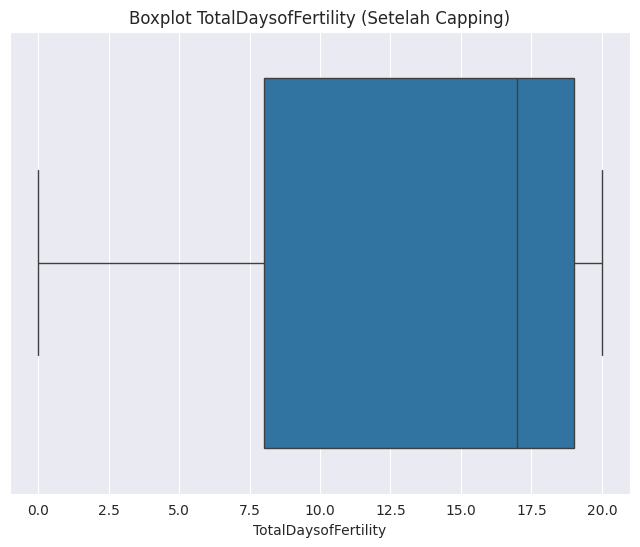

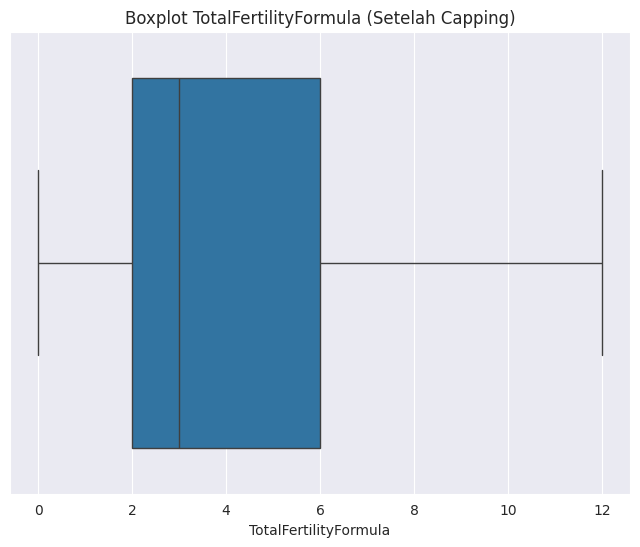

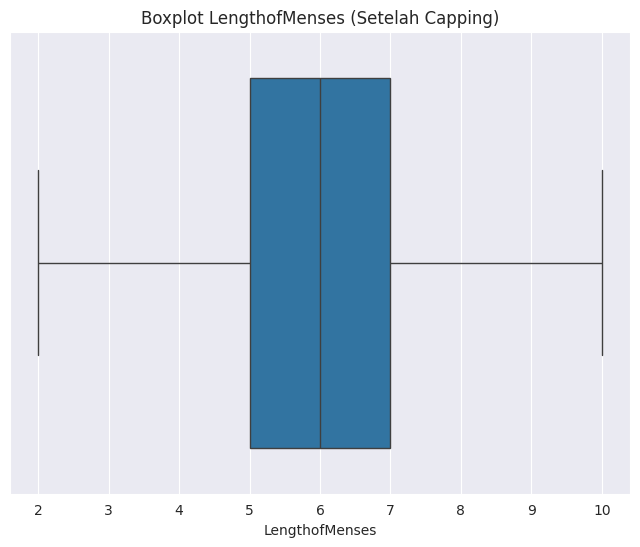

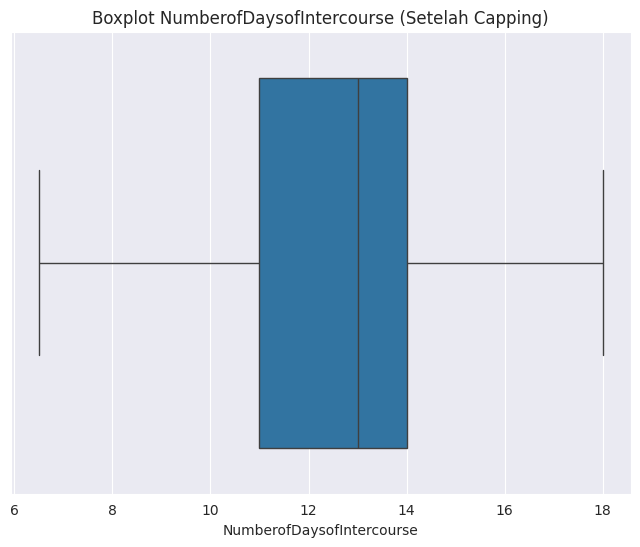

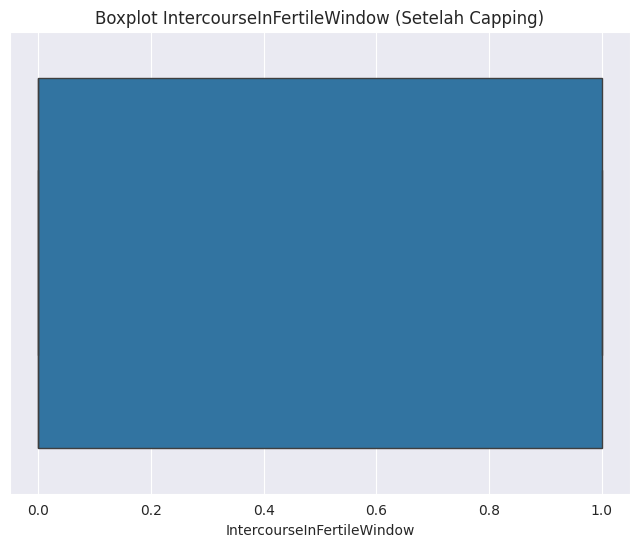

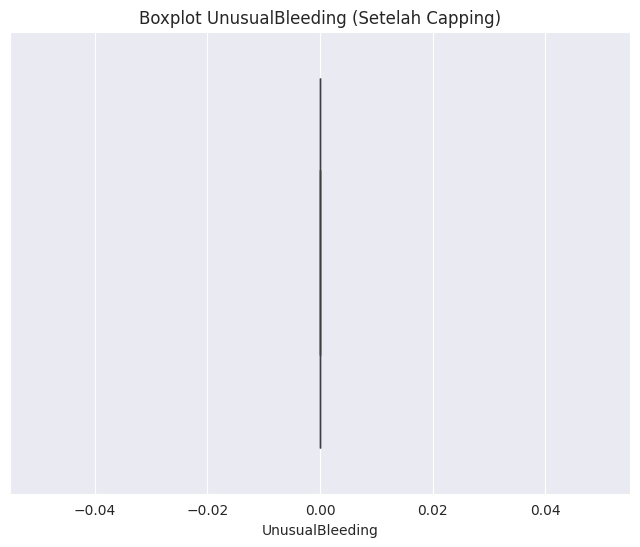

In [ ]:
# Visualisasi Hasil Outlier setelah Capping
print("\nVisualisasi Outliers setelah Capping (Boxplot):")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} (Setelah Capping)')
    plt.show()

In [ ]:
# Tambahkan fitur buatan
def calculate_repro_health(row):
    score = 3 # Nilai dasar
    # Pastikan kolom ada sebelum diakses dan tidak NaN
    if 'UnusualBleeding' in row and pd.notna(row['UnusualBleeding']) and row['UnusualBleeding'] == 1:
        score -= 1
    if 'TotalMensesScore' in row and pd.notna(row['TotalMensesScore']) and row['TotalMensesScore'] > 15:
        score -= 1
    if 'LengthofCycle' in row and pd.notna(row['LengthofCycle']):
        cycle_len = row['LengthofCycle']
        if cycle_len < 21 or cycle_len > 35:
            score -= 1.5
    return max(1, min(5, score))


df['StressScore'] = np.random.randint(1, 6, len(df))
df['DietScore'] = np.random.randint(1, 6, len(df))
df['ReproHealthScore'] = df.apply(calculate_repro_health, axis=1)

# Ubah target numerik menjadi kategori
def classify_cycle(length):
    if 21 <= length <= 25:
        return 'Siklus Pendek'
    elif 26 <= length <= 30:
        return 'Siklus Sedang'
    elif 31 <= length <= 35:
        return 'Siklus Panjang'
    else:
        return 'Tidak Normal'

df['CycleCategory'] = df['LengthofCycle'].apply(classify_cycle)

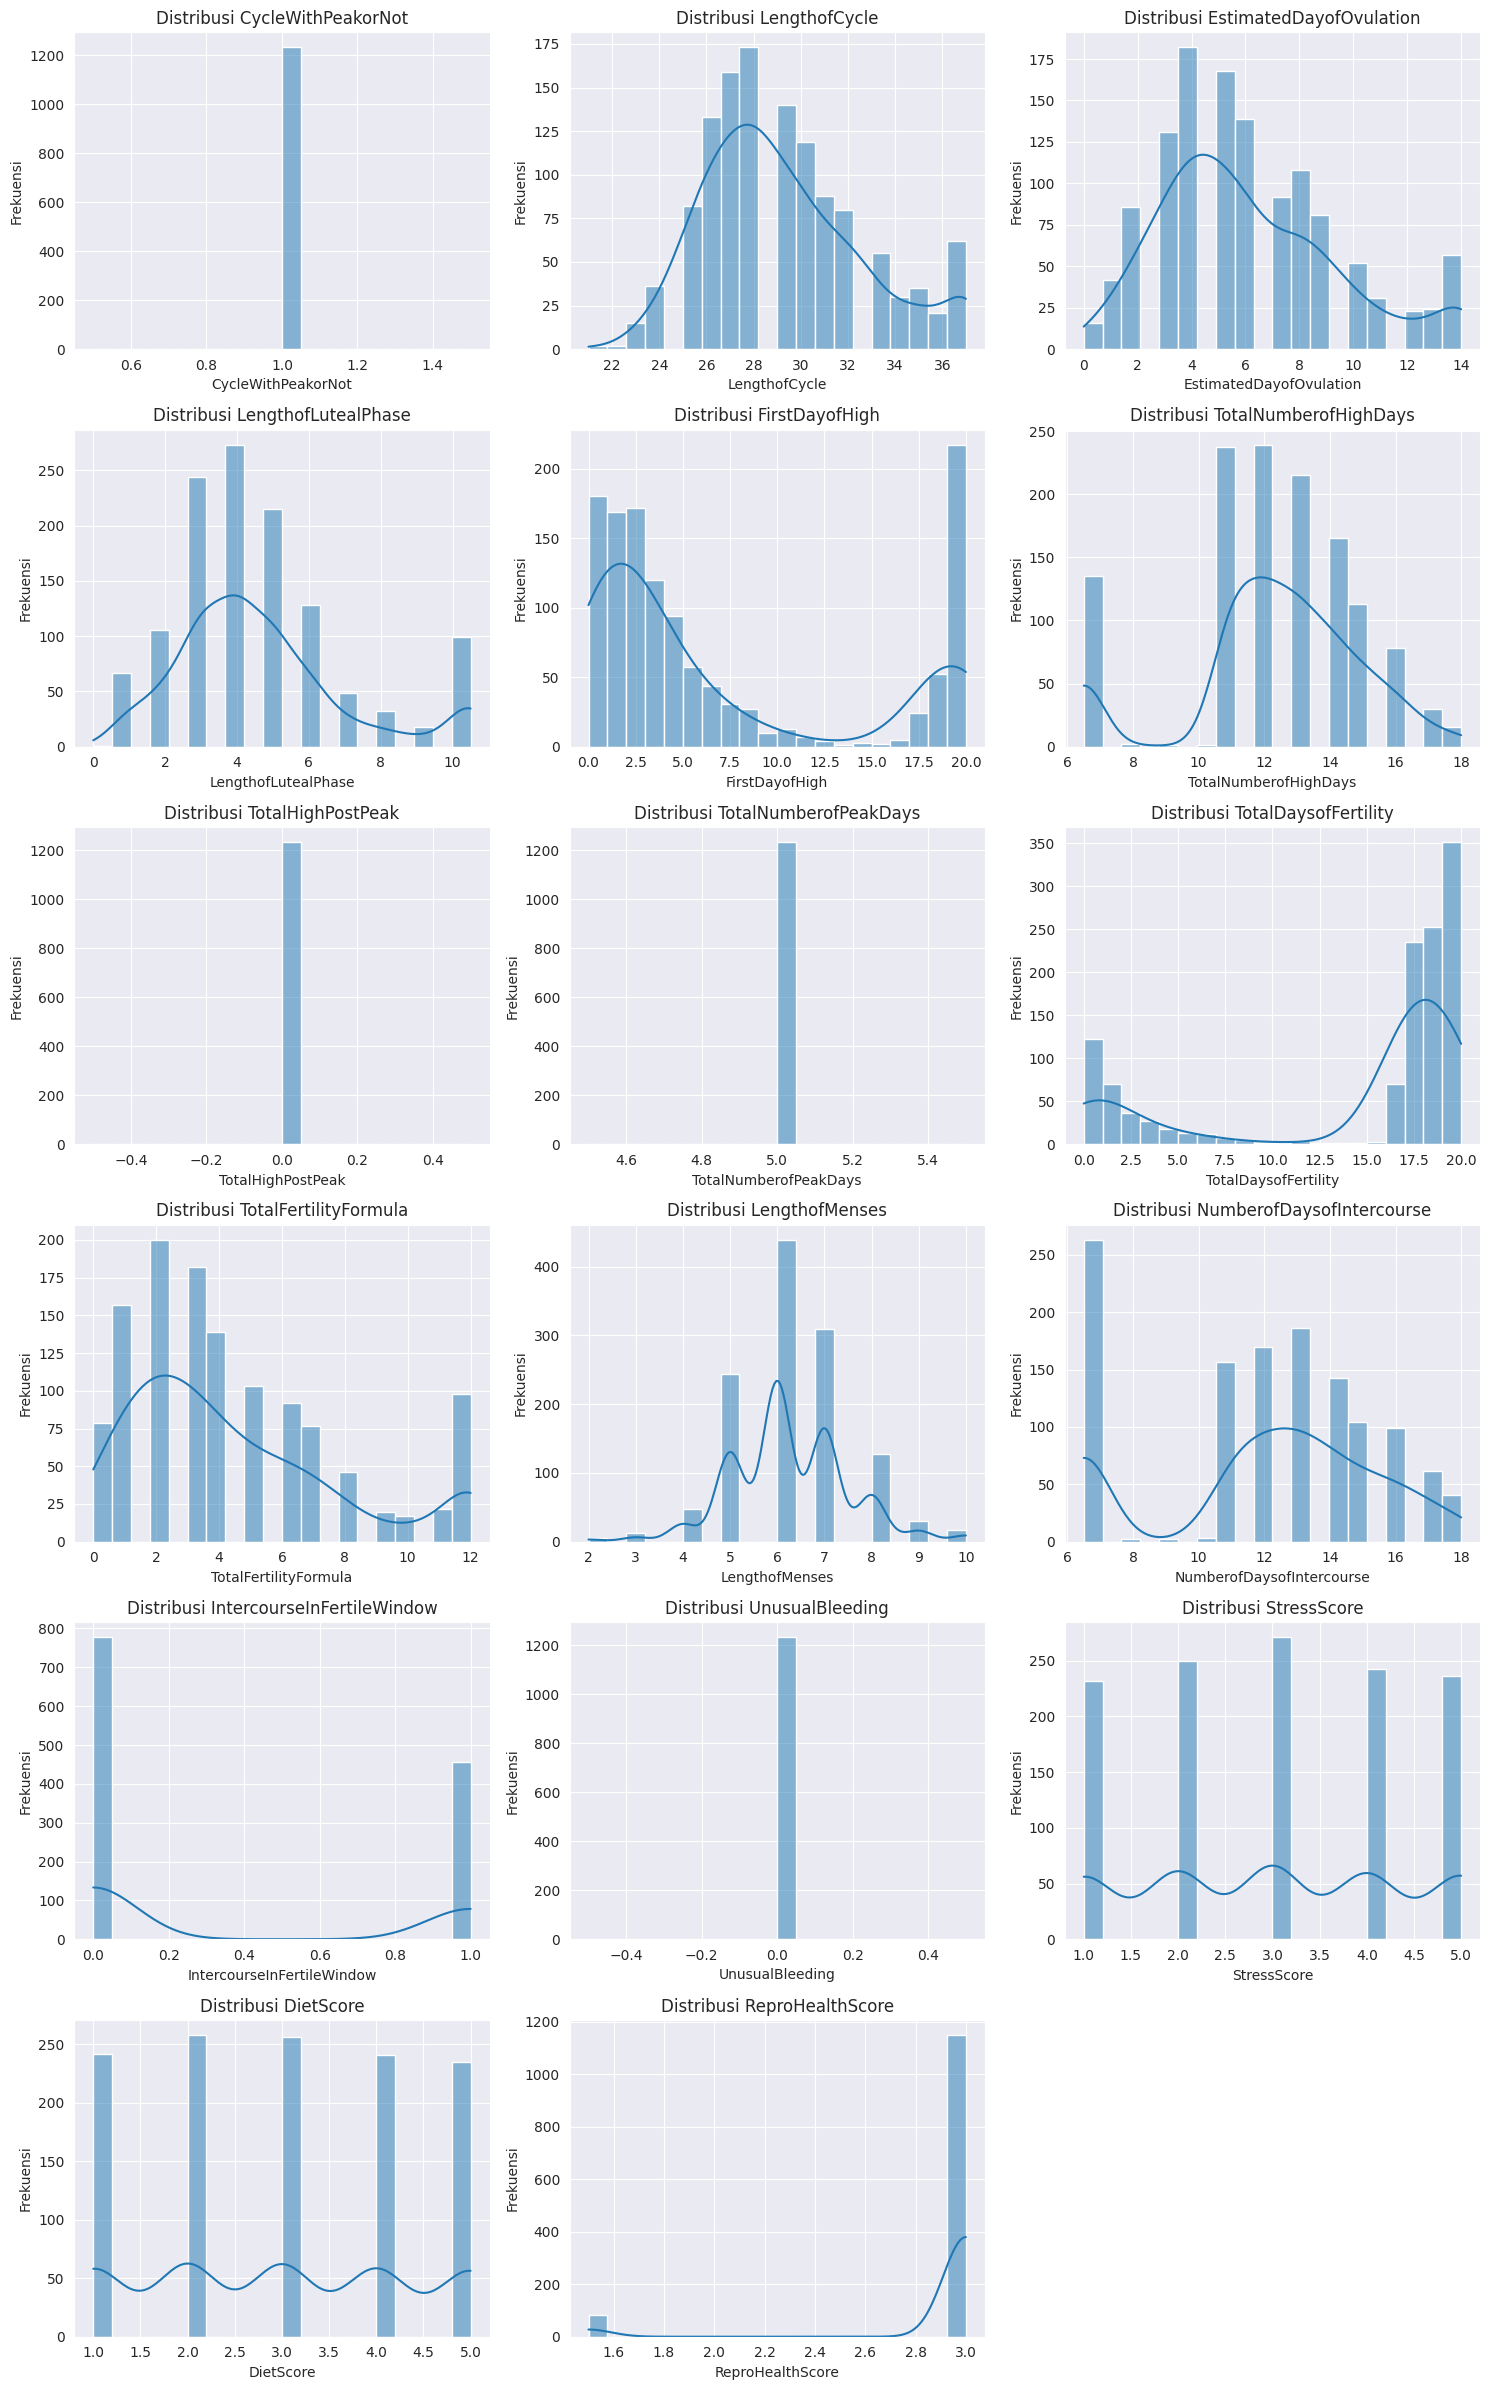

In [ ]:
# Plot distribusi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frekuensi', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Fitur yang akan digunakan
features = [
    'CycleWithPeakorNot', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
    'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
    'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
    'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding',

    # Fitur Engineering
    'StressScore',
    'DietScore',
    'ReproHealthScore'
]

In [ ]:
df.shape

(1232, 18)

In [ ]:
# Copy data hasil prerocessing dan simpan
new_df = df.copy()
new_df.to_csv('preprocessed_data.csv', index=False)

### SMOTE dan Scalling

In [ ]:
# Memilih fitur (X) dan target (y)
X = new_df[features]
y = new_df['CycleCategory']

print(f"\nDistribusi target sebelum SMOTE:")
print(y.value_counts())

# Menggunakan SMOTE untuk mengatasi imbalance kelas
min_samples = y.value_counts().min()
smote_k_neighbors = min(3, min_samples - 1)
if smote_k_neighbors < 1:
    print("Warning: Tidak cukup sampel untuk menggunakan SMOTE (min_samples < 2). Melanjutkan tanpa SMOTE.")
    X_smote = X
    y_smote = y
else:
    smote = SMOTE(random_state=42, k_neighbors=smote_k_neighbors)
    X_smote, y_smote = smote.fit_resample(X, y)

# Cek hasil kelas setelah di SMOTE
print(f"\nDistribusi target setelah SMOTE:")
print(pd.Series(y_smote).value_counts())


Distribusi target sebelum SMOTE:
CycleCategory
Siklus Sedang     724
Siklus Panjang    288
Siklus Pendek     137
Tidak Normal       83
Name: count, dtype: int64

Distribusi target setelah SMOTE:
CycleCategory
Siklus Sedang     724
Siklus Pendek     724
Siklus Panjang    724
Tidak Normal      724
Name: count, dtype: int64


In [ ]:
# Label encoding untuk target (jika belum numerik)
label_encoder_target = LabelEncoder()
y_encoded = label_encoder_target.fit_transform(y_smote)
num_classes = len(np.unique(y_encoded))

print(f"\nJumlah kelas unik: {num_classes}")
print(f"Nama kelas yang di-encode: {label_encoder_target.classes_}")


Jumlah kelas unik: 4
Nama kelas yang di-encode: ['Siklus Panjang' 'Siklus Pendek' 'Siklus Sedang' 'Tidak Normal']


In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split train-test (80:20) dengan stratifikasi untuk menjaga proporsi kelas
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Menampilkan bentuk data train dan test
print(f"\nBentuk data training: {X_train.shape}")
print(f"Bentuk data testing: {X_test.shape}")


Bentuk data training: (2316, 16)
Bentuk data testing: (580, 16)


In [ ]:
# Konversi label ke format kategorikal (one-hot encoding) untuk Deep Learning
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"Bentuk target training (categorical): {y_train_cat.shape}")
print(f"Bentuk target testing (categorical): {y_test_cat.shape}")

Bentuk target training (categorical): (2316, 4)
Bentuk target testing (categorical): (580, 4)


## Modeling


### Deep Learning

In [ ]:
# Membuat model Deep Learning
input_shape = X_train.shape[1]

def create_dl_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

dl_model = create_dl_model(input_shape, num_classes)
dl_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,540 (52.89 KB)

 Trainable params: 13,092 (51.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Callbacks untuk Early Stopping dan Reduce Learning Rate
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Training Model Deep Learning
print("\nMemulai training Deep Learning model...")
history = dl_model.fit(
    X_train, y_train_cat,
    epochs=300,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Memulai training Deep Learning model...
Epoch 1/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.2299 - loss: 2.0967 - val_accuracy: 0.2651 - val_loss: 1.4016 - learning_rate: 1.0000e-04
Epoch 2/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3029 - loss: 1.8304 - val_accuracy: 0.3534 - val_loss: 1.3364 - learning_rate: 1.0000e-04
Epoch 3/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3327 - loss: 1.6652 - val_accuracy: 0.4741 - val_loss: 1.2321 - learning_rate: 1.0000e-04
Epoch 4/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4296 - loss: 1.4028 - val_accuracy: 0.5496 - val_loss: 1.1173 - learning_rate: 1.0000e-04
Epoch 5/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4270 - loss: 1.3689 - val_accuracy: 0.5711 - val_loss: 1.0056 - learning_rate: 1.0000e-04
Epoch 6/300
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4667 - loss: 1.3175 - val_accuracy: 0.5991 - val_loss: 0.9168 - learning_rate: 1.0000e-04
Epoch 7/300
58/58 ━━━━━━━━━

### Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=750,
    max_depth=49,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=49, max_features='log2', min_samples_split=3,
                       n_estimators=750, random_state=42)

### XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=720,
    max_depth=6,
    learning_rate=0.05,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=720,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### SVM Modeling

In [ ]:
# membangun model dengan SVM
svm_model = SVC(kernel='rbf', C=4, random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)

SVC(C=4, class_weight='balanced', probability=True, random_state=42)

## Evaluation


### Deep Learning

In [ ]:
# Evaluasi Deep Learning
print("\n--- Evaluasi Model Deep Learning ---")
dl_loss, dl_accuracy = dl_model.evaluate(X_test, y_test_cat, verbose=0)
y_pred_probs_dl = dl_model.predict(X_test, verbose=0)
y_pred_dl = np.argmax(y_pred_probs_dl, axis=1)

# Evaluasi model lainnya
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)


--- Evaluasi Model Deep Learning ---


In [ ]:
print(f"Akurasi Test Deep Learning: {dl_accuracy:.4f}")

# Classification report (untuk metrik detail per kelas)
print("\n=== Classification Report Deep Learning ===")
print(classification_report(y_test, y_pred_dl, target_names=label_encoder_target.classes_))

Akurasi Test Deep Learning: 0.9397

=== Classification Report Deep Learning ===
                precision    recall  f1-score   support

Siklus Panjang       0.90      0.97      0.93       145
 Siklus Pendek       0.88      0.97      0.92       145
 Siklus Sedang       0.99      0.82      0.90       145
  Tidak Normal       1.00      1.00      1.00       145

      accuracy                           0.94       580
     macro avg       0.94      0.94      0.94       580
  weighted avg       0.94      0.94      0.94       580



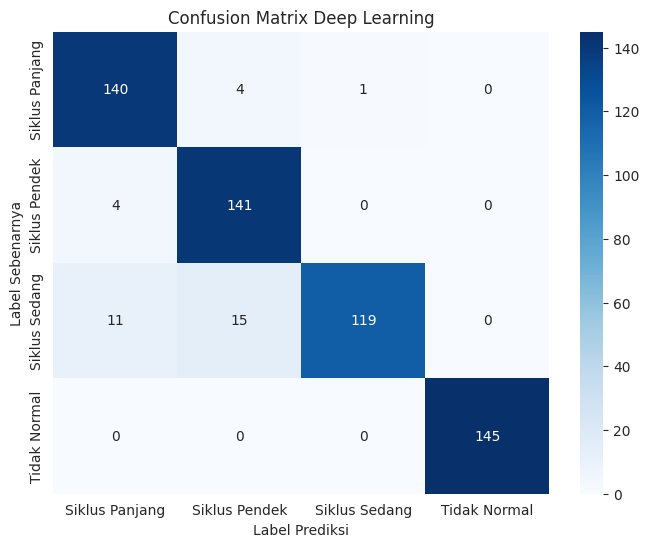

In [ ]:
# Confusion matrix Deep Learning
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix Deep Learning')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

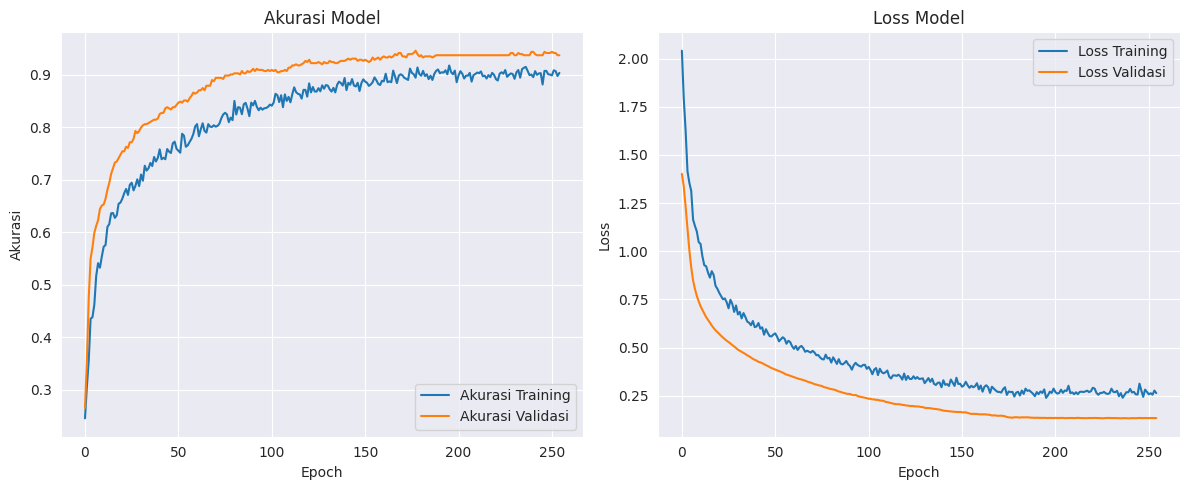

In [ ]:
# Plot training history (akurasi dan loss)
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
print("\n--- Evaluasi Model Random Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Akurasi Model Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score Random Forest (Weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder_target.classes_))


--- Evaluasi Model Random Forest ---
Confusion Matrix:
 [[142   0   3   0]
 [  0 140   5   0]
 [  4   1 140   0]
 [  0   0   0 145]]
Akurasi Model Random Forest: 0.9776
F1 Score Random Forest (Weighted): 0.9776

Classification Report Random Forest:
                 precision    recall  f1-score   support

Siklus Panjang       0.97      0.98      0.98       145
 Siklus Pendek       0.99      0.97      0.98       145
 Siklus Sedang       0.95      0.97      0.96       145
  Tidak Normal       1.00      1.00      1.00       145

      accuracy                           0.98       580
     macro avg       0.98      0.98      0.98       580
  weighted avg       0.98      0.98      0.98       580



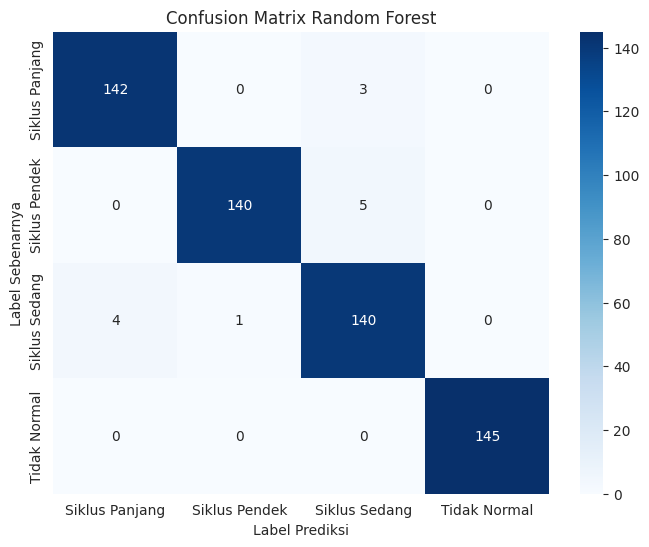

In [ ]:
# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix Random Forest')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

### XGBoost

In [ ]:
print("\n--- Evaluasi Model XGBoost ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"Akurasi Model XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score XGBoost (Weighted): {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print("\nClassification Report XGBoost:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder_target.classes_))


--- Evaluasi Model XGBoost ---
Confusion Matrix:
 [[145   0   0   0]
 [  0 144   1   0]
 [  1   0 144   0]
 [  0   0   0 145]]
Akurasi Model XGBoost: 0.9966
F1 Score XGBoost (Weighted): 0.9966

Classification Report XGBoost:
                 precision    recall  f1-score   support

Siklus Panjang       0.99      1.00      1.00       145
 Siklus Pendek       1.00      0.99      1.00       145
 Siklus Sedang       0.99      0.99      0.99       145
  Tidak Normal       1.00      1.00      1.00       145

      accuracy                           1.00       580
     macro avg       1.00      1.00      1.00       580
  weighted avg       1.00      1.00      1.00       580



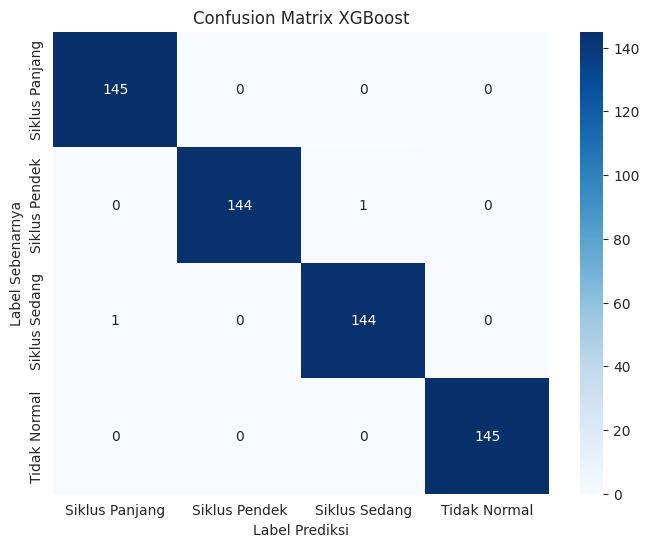

In [ ]:
# Confusion Matrix XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix XGBoost')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

### SVM

In [ ]:
print("\n--- Evaluasi Model SVM ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(f"Akurasi Model SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score SVM (Weighted): {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")
print("\nClassification Report SVM:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder_target.classes_))


--- Evaluasi Model SVM ---
Confusion Matrix:
 [[139   2   4   0]
 [  0 141   4   0]
 [ 10   9 126   0]
 [  0   0   0 145]]
Akurasi Model SVM: 0.9500
F1 Score SVM (Weighted): 0.9496

Classification Report SVM:
                 precision    recall  f1-score   support

Siklus Panjang       0.93      0.96      0.95       145
 Siklus Pendek       0.93      0.97      0.95       145
 Siklus Sedang       0.94      0.87      0.90       145
  Tidak Normal       1.00      1.00      1.00       145

      accuracy                           0.95       580
     macro avg       0.95      0.95      0.95       580
  weighted avg       0.95      0.95      0.95       580



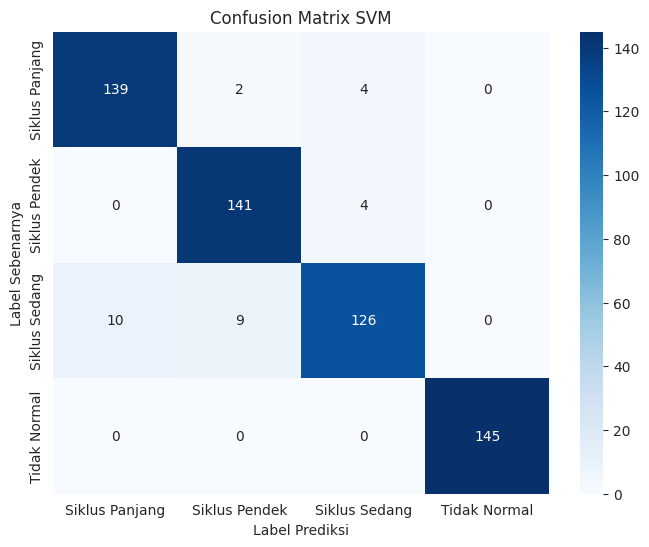

In [ ]:
# Confusion Matrix SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_target.classes_,
            yticklabels=label_encoder_target.classes_)
plt.title('Confusion Matrix SVM')
plt.ylabel('Label Sebenarnya')
plt.xlabel('Label Prediksi')
plt.show()

### Evaluasi Komparatif

In [ ]:
# Bandingkan performa semua model
models = {
    'Deep Learning': y_pred_dl,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'SVM': y_pred_svm
}

rows_list = []
for name, pred in models.items():
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')
    prec = precision_score(y_test, pred, average='weighted')
    rec = recall_score(y_test, pred, average='weighted')

    rows_list.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Precision': prec,
        'Recall': rec
    })

comparison_df = pd.DataFrame.from_records(rows_list)

print("\n=== Perbandingan Kinerja Model ===")
print(comparison_df.sort_values(by='F1-Score', ascending=False).round(4))


=== Perbandingan Kinerja Model ===
           Model  Accuracy  F1-Score  Precision  Recall
2        XGBoost    0.9966    0.9966     0.9966  0.9966
1  Random Forest    0.9776    0.9776     0.9779  0.9776
3            SVM    0.9500    0.9496     0.9502  0.9500
0  Deep Learning    0.9397    0.9390     0.9440  0.9397


<Figure size 1200x800 with 0 Axes>

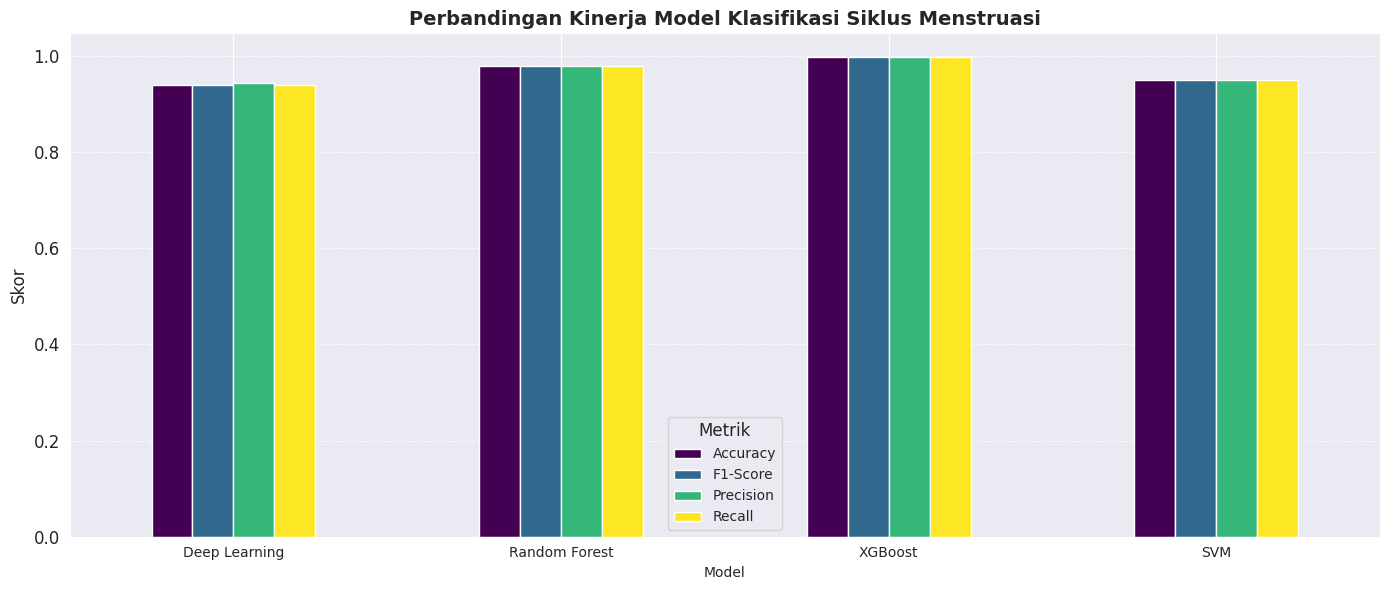

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
comparison_df.set_index('Model')[metrics].plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('Perbandingan Kinerja Model Klasifikasi Siklus Menstruasi', fontsize=14, fontweight='bold')
plt.ylabel('Skor', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title='Metrik', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Save Model

In [ ]:
# Buat direktori untuk menyimpan model jika belum ada
os.makedirs('model', exist_ok=True)

# Simpan model Deep Learning dalam format Keras
try:
    dl_model.save('model/cycle_mens_dl.h5', save_format='h5', include_optimizer=False)
    print("✅ Model Deep Learning (H5) berhasil disimpan.")
except Exception as e:
    print(f"❗ Error menyimpan model Deep Learning: {e}")

# Simpan model lainnya menggunakan joblib
try:
    joblib.dump(rf_model, 'model/rf_model.joblib')
    joblib.dump(xgb_model, 'model/xgb_model.joblib')
    joblib.dump(svm_model, 'model/svm_model.joblib')
    print("✅ Model Random Forest, XGBoost, dan SVM berhasil disimpan.")
except Exception as e:
    print(f"❗ Error menyimpan model Machine Learning: {e}")

# Simpan preprocessing objects (scaler dan label encoder) dengan joblib
try:
    joblib.dump(scaler, 'model/scaler.joblib')
    joblib.dump(label_encoder_target, 'model/label_encoder.joblib')
    joblib.dump(label_encoders_map, 'model/categorical_encoders.joblib')
    print("✅ Scaler, Label Encoder, dan Categorical Encoders berhasil disimpan.")
except Exception as e:
    print(f"❗ Error menyimpan objek preprocessing: {e}")

# Simpan metadata fitur dalam format JSON
feature_metadata = {
    'features': features,
    'num_classes': int(num_classes),
    'class_names': label_encoder_target.classes_.tolist(),
    'tensorflow_version': tf.__version__,
    'model_input_shape': int(input_shape),
    'feature_descriptions': {
        'CycleWithPeakorNot': 'Indikator apakah siklus memiliki puncak hormon LH (0: Tidak, 1: Ya)',
        'EstimatedDayofOvulation': 'Perkiraan hari ovulasi',
        'LengthofLutealPhase': 'Panjang fase luteal (hari)',
        'FirstDayofHigh': 'Hari pertama hormon LH tinggi',
        'TotalNumberofHighDays': 'Total hari dengan pembacaan hormon LH tinggi',
        'TotalHighPostPeak': 'Total hari dengan pembacaan hormon LH tinggi setelah puncak ovulasi',
        'TotalNumberofPeakDays': 'Total hari dengan pembacaan hormon LH puncak',
        'TotalDaysofFertility': 'Total hari dalam periode subur',
        'TotalFertilityFormula': 'Skor formula kesuburan',
        'LengthofMenses': 'Panjang durasi menstruasi (hari)',
        'NumberofDaysofIntercourse': 'Jumlah hari dengan hubungan seksual',
        'IntercourseInFertileWindow': 'Indikator hubungan seksual di jendela subur (0: Tidak, 1: Ya)',
        'UnusualBleeding': 'Indikator pendarahan tidak biasa (0: Tidak, 1: Ya)',
        'DietScore': 'Skor pola makan (1-5, semakin tinggi semakin baik)',
        'ReproHealthScore': 'Skor kesehatan reproduksi (1-5, semakin tinggi semakin baik)',
        'StressScore': 'Skor tingkat stres (1-5, semakin tinggi semakin stres)'
    },
    'cycle_classification_kemenkes_interpretation': {
        'Siklus Pendek': '21-25 hari (dalam rentang normal Kemenkes RI, namun lebih pendek)',
        'Siklus Sedang': '26-30 hari (dalam rentang normal Kemenkes RI, rata-rata)',
        'Siklus Panjang': '31-35 hari (dalam rentang normal Kemenkes RI, namun lebih panjang)',
        'Tidak Normal': '<21 hari atau >35 hari (di luar rentang normal Kemenkes RI)'
    }
}

with open('model/model_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(feature_metadata, f, ensure_ascii=False, indent=4)
print("✅ Metadata model berhasil disimpan.")

# Simpan sample data untuk testing
sample_data = {
    'sample_input': X_test[:5].tolist(),
    'sample_output': y_test[:5].tolist(),
    'sample_predictions_dl': y_pred_dl[:5].tolist()
}

with open('model/sample_data.json', 'w') as f:
    json.dump(sample_data, f, indent=4)
print("✅ Sample data untuk testing berhasil disimpan.")

print("\n" + "="*60)
print("PROSES TRAINING SELESAI!")
print("="*60)
print(f"✅ Semua model berhasil dilatih dan disimpan.")
print(f"✅ Versi TensorFlow yang digunakan: {tf.__version__}")
print(f"✅ Akurasi model Deep Learning: {dl_accuracy:.4f}")
print(f"✅ File model dan preprocessing tersimpan di direktori 'model/'.")

✅ Model Deep Learning (H5) berhasil disimpan.
✅ Model Random Forest, XGBoost, dan SVM berhasil disimpan.
✅ Scaler, Label Encoder, dan Categorical Encoders berhasil disimpan.
✅ Metadata model berhasil disimpan.
✅ Sample data untuk testing berhasil disimpan.

PROSES TRAINING SELESAI!
✅ Semua model berhasil dilatih dan disimpan.
✅ Versi TensorFlow yang digunakan: 2.18.0
✅ Akurasi model Deep Learning: 0.9397
✅ File model dan preprocessing tersimpan di direktori 'model/'.


# Inference Models

In [ ]:
import pandas as pd
import numpy as np
import joblib
import json
import tensorflow as tf
import os

# --- 1. Konfigurasi dan Pembuatan Direktori ---
MODEL_DIR = 'model'
if not os.path.exists(MODEL_DIR):
    print(f"Error: Direktori model '{MODEL_DIR}' tidak ditemukan. Pastikan Anda telah menjalankan script training dan menyimpan model.")
    exit()

# --- 2. Memuat Aset yang Telah Disimpan ---
try:
    print("Memuat aset preprocessing dan model...")
    scaler = joblib.load(os.path.join(MODEL_DIR, 'scaler.joblib'))
    label_encoder = joblib.load(os.path.join(MODEL_DIR, 'label_encoder.joblib'))

    with open(os.path.join(MODEL_DIR, 'model_metadata.json'), 'r', encoding='utf-8') as f:
        model_metadata = json.load(f)

    features = model_metadata['features']
    class_names = model_metadata['class_names']
    input_shape = model_metadata['model_input_shape']

    # Memuat model Deep Learning (menggunakan compile=False karena optimizer tidak disertakan saat disimpan)
    # Perhatikan: Saat memuat model H5 yang disimpan dengan include_optimizer=False,
    # Anda mungkin perlu mengkompilasinya kembali jika ingin melanjutkan pelatihan.
    # Untuk inferensi saja, ini biasanya tidak masalah.
    dl_model = tf.keras.models.load_model(os.path.join(MODEL_DIR, 'cycle_mens_dl.h5'), compile=False)

    rf_model = joblib.load(os.path.join(MODEL_DIR, 'rf_model.joblib'))
    xgb_model = joblib.load(os.path.join(MODEL_DIR, 'xgb_model.joblib'))
    svm_model = joblib.load(os.path.join(MODEL_DIR, 'svm_model.joblib'))
    print("Aset berhasil dimuat.")

except Exception as e:
    print(f"Error saat memuat aset: {e}")
    print("Pastikan semua file model dan preprocessing (scaler.joblib, label_encoder.joblib, model_metadata.json, .h5, .joblib) ada di direktori 'model/'.")
    exit()

# --- 3. Fungsi Inferensi ---
def predict_cycle_category(input_data: dict, model_name: str = 'Deep Learning'):
    """
    Melakukan prediksi kategori siklus menstruasi untuk satu titik data baru.

    Args:
        input_data (dict): Kamus yang berisi nilai-nilai untuk setiap fitur.
                           Pastikan semua fitur yang terdaftar di 'features' metadata model tersedia.
                           Contoh:
                           {
                               'CycleWithPeakorNot': 1,
                               'EstimatedDayofOvulation': 14,
                               'LengthofLutealPhase': 12,
                               'FirstDayofHigh': 9,
                               'TotalNumberofHighDays': 4,
                               'TotalHighPostPeak': 2,
                               'TotalNumberofPeakDays': 1,
                               'TotalDaysofFertility': 6,
                               'TotalFertilityFormula': 15,
                               'LengthofMenses': 5,
                               'NumberofDaysofIntercourse': 3,
                               'IntercourseInFertileWindow': 1,
                               'UnusualBleeding': 0,
                               'StressScore': 3,
                               'DietScore': 4,
                               'ReproHealthScore': 5
                           }
        model_name (str): Nama model yang akan digunakan ('Deep Learning', 'Random Forest', 'XGBoost', 'SVM').

    Returns:
        tuple: (Kategori siklus yang diprediksi, probabilitas/skor kepercayaan)
               Mengembalikan None jika terjadi kesalahan atau model tidak valid.
    """
    # Mengubah input data ke format DataFrame untuk konsistensi dengan scaler
    # Membuat DataFrame langsung dengan urutan kolom yang benar
    input_df = pd.DataFrame([input_data], columns=features)

    # Memastikan semua fitur ada dan mengisi nilai yang hilang (jika ada) dengan 0
    # Ini penting jika input_data tidak lengkap, meskipun idealnya harus lengkap.
    for feature in features:
        if feature not in input_df.columns:
            input_df[feature] = 0 # Fallback: isi dengan 0 jika fitur tidak ada
            print(f"Peringatan: Fitur '{feature}' tidak ditemukan dalam input_data. Mengisi dengan 0.")

    # Pastikan urutan kolom sesuai dengan 'features' yang digunakan saat training scaler
    input_df = input_df[features]

    # Melakukan penskalaan data
    try:
        # Menggunakan DataFrame langsung untuk mempertahankan nama fitur
        scaled_input = scaler.transform(input_df)
    except Exception as e:
        print(f"Error saat penskalaan input: {e}")
        return None, None

    # Melakukan prediksi berdasarkan model yang dipilih
    predicted_class_idx = -1
    prediction_score = None

    if model_name == 'Deep Learning':
        predictions = dl_model.predict(scaled_input, verbose=0)
        predicted_class_idx = np.argmax(predictions)
        prediction_score = predictions[0][predicted_class_idx]
    elif model_name == 'Random Forest':
        predictions = rf_model.predict_proba(scaled_input)
        predicted_class_idx = np.argmax(predictions)
        prediction_score = predictions[0][predicted_class_idx]
    elif model_name == 'XGBoost':
        predictions = xgb_model.predict_proba(scaled_input)
        predicted_class_idx = np.argmax(predictions)
        prediction_score = predictions[0][predicted_class_idx]
    elif model_name == 'SVM':
        # SVM perlu diatur probability=True saat training agar predict_proba bisa digunakan
        if hasattr(svm_model, 'predict_proba'):
            predictions = svm_model.predict_proba(scaled_input)
            predicted_class_idx = np.argmax(predictions)
            prediction_score = predictions[0][predicted_class_idx]
        else:
            # Jika probability=False saat training, gunakan predict_confidence
            predicted_class_idx = svm_model.predict(scaled_input)[0]
            prediction_score = "N/A (probabilitas tidak tersedia)" # SVM tanpa predict_proba
            print("Peringatan: Model SVM tidak dilatih dengan 'probability=True'. Tidak dapat memberikan probabilitas.")
    else:
        print(f"Model '{model_name}' tidak valid.")
        return None, None

    # Mengubah indeks kelas kembali ke nama kelas yang mudah dibaca
    predicted_category = label_encoder.inverse_transform([predicted_class_idx])[0]

    return predicted_category, prediction_score

# --- 4. Contoh Penggunaan (Data Sampel) ---
print("\n--- Contoh Inferensi dengan Data Sampel ---")

# Data sampel untuk prediksi
# CATATAN: Pastikan semua fitur yang ada di `features` metadata model disertakan
# Fitur seperti StressScore, DietScore, ReproHealthScore harus disediakan
# sebagai bagian dari input data baru Anda.
sample_input_data = {
    'CycleWithPeakorNot': 1,
    'EstimatedDayofOvulation': 14,
    'LengthofLutealPhase': 12,
    'FirstDayofHigh': 9,
    'TotalNumberofHighDays': 4,
    'TotalHighPostPeak': 2,
    'TotalNumberofPeakDays': 1,
    'TotalDaysofFertility': 6,
    'TotalFertilityFormula': 15,
    'LengthofMenses': 5,
    'NumberofDaysofIntercourse': 3,
    'IntercourseInFertileWindow': 1,
    'UnusualBleeding': 0,
    'StressScore': 3,
    'DietScore': 4,
    'ReproHealthScore': 5
}

print(f"\nData input sampel: {sample_input_data}")

# Melakukan prediksi dengan setiap model
models_to_test = ['Deep Learning', 'Random Forest', 'XGBoost', 'SVM']

for model_name in models_to_test:
    predicted_category, score = predict_cycle_category(sample_input_data, model_name)
    if predicted_category is not None:
        print(f"\nModel {model_name}:")
        print(f"  Kategori Siklus Diprediksi: {predicted_category}")
        if score is not None and score != "N/A (probabilitas tidak tersedia)":
            print(f"  Skor Kepercayaan (Probabilitas): {score:.4f}")
        else:
            print(f"  Skor Kepercayaan: {score}")


print("\n--- Inferensi Selesai ---")

Memuat aset preprocessing dan model...
Aset berhasil dimuat.

--- Contoh Inferensi dengan Data Sampel ---

Data input sampel: {'CycleWithPeakorNot': 1, 'EstimatedDayofOvulation': 14, 'LengthofLutealPhase': 12, 'FirstDayofHigh': 9, 'TotalNumberofHighDays': 4, 'TotalHighPostPeak': 2, 'TotalNumberofPeakDays': 1, 'TotalDaysofFertility': 6, 'TotalFertilityFormula': 15, 'LengthofMenses': 5, 'NumberofDaysofIntercourse': 3, 'IntercourseInFertileWindow': 1, 'UnusualBleeding': 0, 'StressScore': 3, 'DietScore': 4, 'ReproHealthScore': 5}

Model Deep Learning:
  Kategori Siklus Diprediksi: Siklus Panjang
  Skor Kepercayaan (Probabilitas): 0.9991

Model Random Forest:
  Kategori Siklus Diprediksi: Siklus Panjang
  Skor Kepercayaan (Probabilitas): 0.4732

Model XGBoost:
  Kategori Siklus Diprediksi: Siklus Panjang
  Skor Kepercayaan (Probabilitas): 0.5957

Model SVM:
  Kategori Siklus Diprediksi: Siklus Sedang
  Skor Kepercayaan (Probabilitas): 0.6676

--- Inferensi Selesai ---
